In [1]:
%load_ext autoreload
%autoreload 2

from base64 import b64encode
import copy
from datetime import datetime
import getopt
import io
from io import BytesIO
import os
import sys


import json

# standard numeric/scientific libraries
import numpy as np
import pandas as pd
import scipy as sp
import scipy.signal as sps
import scipy.fftpack as fftpack 

# plotting
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('figure', figsize=(20, 12))

# image display
from PIL import Image
import IPython.display 
from IPython.display import HTML

#internal libraries which may or may not get used
import fdls
from lddutils import *

import lddecode_core as ldd

# Notebook-only functions go here

# Draws a uint16 image, downscaled to uint8
def draw_raw_bwimage(bm, x = 2800, y = 525, hscale = 1, vscale = 2, outsize = None):
    if y is None:
        y = len(bm) // x
        
    if outsize is None:
        outsize = (x * hscale, y * vscale)
    
    bmf = np.uint8(bm[0:x*y] / 256.0)
    print(bmf.shape)
    if x is not None:
        bms = (bmf.reshape(len(bmf)//x, -1))
    else:
        bms = bmf
    
    print(bms.dtype, bms.shape, bms[:][0:y].shape)
    im = Image.fromarray(bms[0:y])
    im = im.resize(outsize)
    b = BytesIO()
    im.save(b, format='png')
    return IPython.display.Image(b.getvalue())


In [2]:
matplotlib.rc('figure', figsize=(20, 12))
plt.style.use('dark_background')

In [3]:
def write_json(ldd, outname):
    jsondict = ldd.build_json(ldd.curfield)
    
    fp = open(outname + '.tbc.json.tmp', 'w')
    json.dump(jsondict, fp, indent=4)
    fp.write('\n')
    fp.close()
    
    os.rename(outname + '.tbc.json.tmp', outname + '.tbc.json')


In [4]:
def r(fl, r = 1000):
    return np.round(fl * r) / r

In [5]:
import warnings
warnings.resetwarnings()
warnings.filterwarnings('error')


In [10]:
from lddecode_core import *

filename = '/home/cpage/Downloads/ldsample_moov5.lds'

outname = 'devbook_i351'
system = 'NTSC'
foutput = False
loader = make_loader(filename)

firstframe = 141
req_frames = 6

ldd = LDdecode(filename, outname, loader, system=system, digital_audio=False)
ldd.roughseek(firstframe * 2)

#ldd.rf.DecoderParams['video_deemp'] = (38.4,60)
ldd.rf.computefilters()

fields = []
for i in range(0, req_frames * 2):
    print('field ', i)
    fields.append(ldd.readfield())
    #ldd.processfield(fields[-1])

write_json(ldd, outname)
#l = 13
#self = fields[1]
#plt.plot(self.data[0]['demod'][self.lineslice(l, 0, 63)].copy())

Exception ignored in: <_io.FileIO name='devbook_i351.tbc' mode='wb' closefd=True>


field  0
{True: 0.29071487511770994, False: 0.20602665162794573} False
field  1
{True: 0.29331521757873896, False: 0.20330566244594087} False
field  2
{True: 0.20245701649788966, False: 0.2941745177023367} True


file frame 142 CLV timecode 0:07.20 frame 230


field  3
{True: 0.19819124828963833, False: 0.2983536517255635} True
2 1
field  4


file frame 143 CLV timecode 0:07.21 frame 231


{True: 0.2953270778239093, False: 0.20133310296836016} False
1 4
field  5
{True: 0.2963926173975024, False: 0.20019230104164054} False
field  6


file frame 144 CLV timecode 0:07.22 frame 232


{True: 0.19778161942430583, False: 0.299093360260334} True
1 4
field  7


{True: 0.2041022219060507, False: 0.2926145113600453} True
4 3
field  8


file frame 145 CLV timecode 0:07.23 frame 233


{True: 0.2912402556528445, False: 0.2053464734760115} False
field  9
{True: 0.29241818662662733, False: 0.20434712214206258} False
field  10


file frame 146 CLV timecode 0:07.24 frame 234


{True: 0.20361672420957735, False: 0.29289440856397586} True
field  11
{True: 0.20341843280813138, False: 0.29332444602056496} True


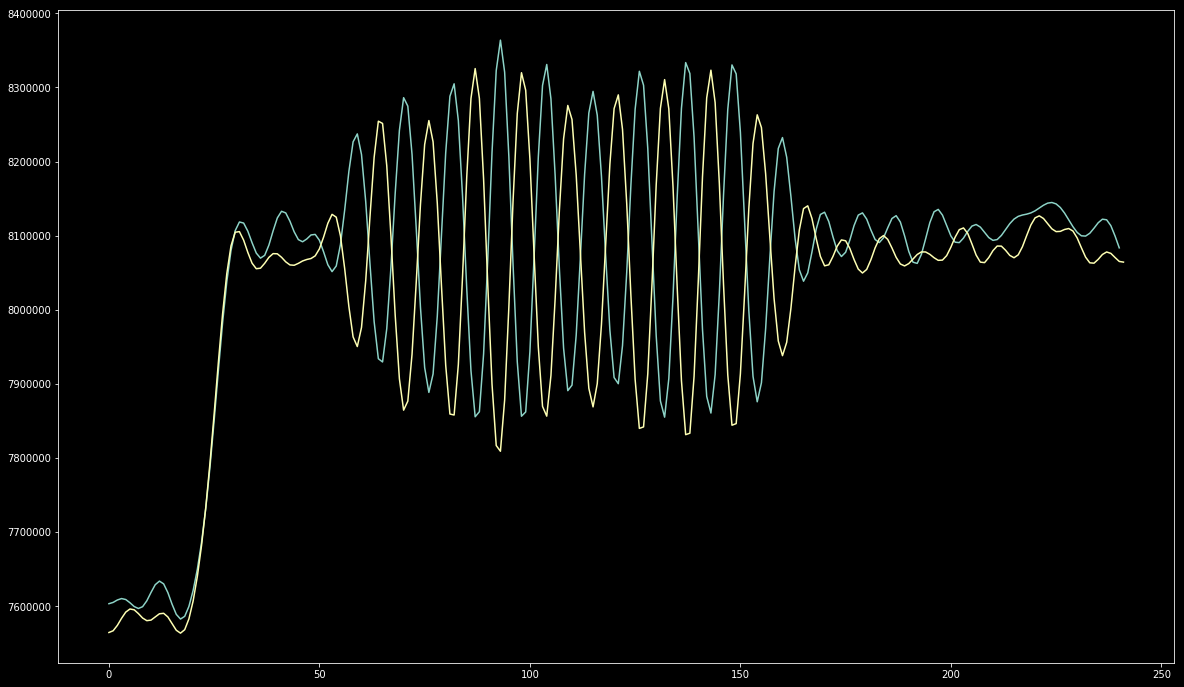

In [27]:
self = fields[1]
ls = self.lineslice(24, 4, 6, linelocs=self.linelocs2)
plt.plot(self.data['video']['demod'][ls])

self = fields[2]
ls = self.lineslice(24, 4, 6, linelocs=self.linelocs2)
plt.plot(self.data['video']['demod'][ls])

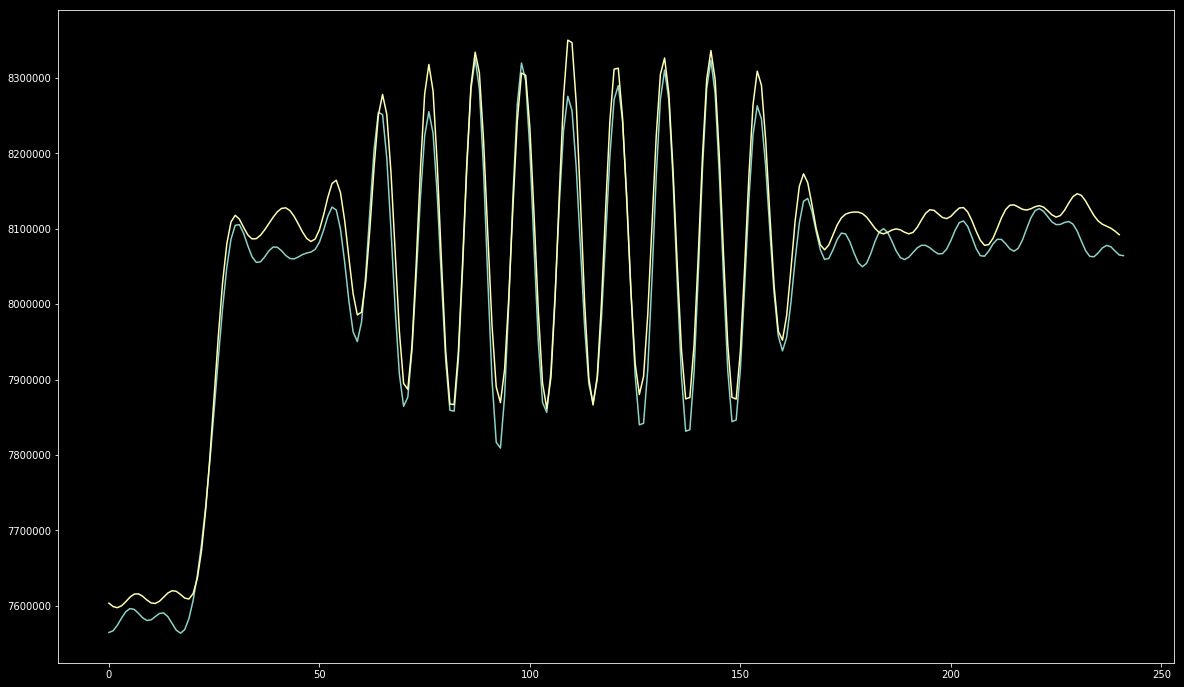

In [26]:
self = fields[2]
ls = self.lineslice(24, 4, 6, linelocs=self.linelocs2)
plt.plot(self.data['video']['demod'][ls])

self = fields[3]
ls = self.lineslice(24, 4, 6, linelocs=self.linelocs2)
plt.plot(self.data['video']['demod'][ls])

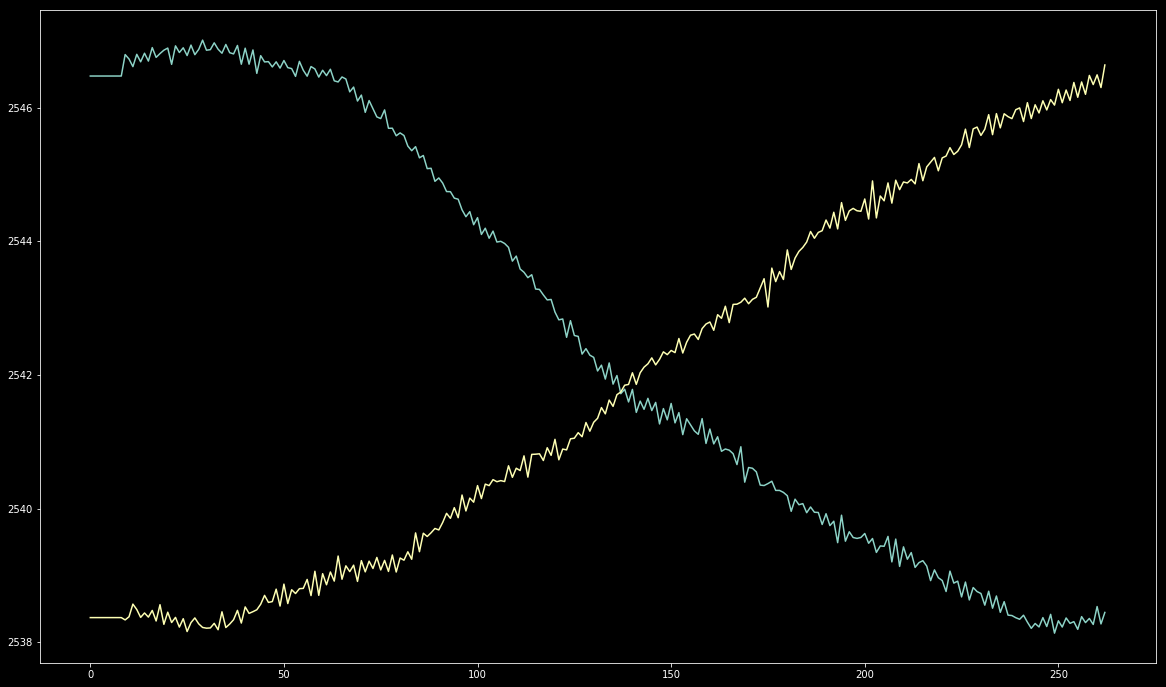

In [20]:
plt.plot(np.diff(fields[2].linelocs[:-5]))
plt.plot(np.diff(fields[3].linelocs[:-5]))